In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from pfct.Thiessen import thiessen
from IPython import display

In [2]:
np.set_printoptions(suppress=True)

### Usando Pluviômetros FUNCEME

In [3]:
# pluviômetros da funceme: https://tinyurl.com/vm8kczbu
gauges_file = 'pr_daily_funceme_19730101_20210921.asc'

In [4]:
# ler arquivo de entrada
data = np.loadtxt(gauges_file)

In [5]:
lon = data[:, 1]           # seleciona a coluna das longitudes
lat = data[:, 2]           # seleciona a coluna das latitudes
pr_daily = data[:, -113:]  # seleciona precipitação obs (2021-06-01 - 2021-09-21)
# pr_daily = data[:, 3:]   # seleciona todas as colunas de precipitação obs

In [6]:
lat

array([-7.361972, -2.885889, -6.11075 , -6.567   , -3.585361, -7.000833,
       -5.512861, -3.361139, -6.767194, -3.95    , -3.9     , -4.568472,
       -4.373306, -7.2     , -4.416944, -6.325778, -6.869639, -6.942583,
       -6.731639, -7.307222, -7.183861, -4.333   , -4.181194, -3.058   ,
       -5.124861, -7.485083, -2.899972, -7.067   , -4.364444, -4.467   ,
       -4.233   , -3.948528, -7.046611, -6.541222, -4.164583, -4.133194,
       -6.13575 , -3.75    , -6.596333, -3.036333, -3.550111, -5.175361,
       -7.238333, -2.930528, -6.923083, -3.798   , -3.758972, -4.048028,
       -3.124083, -6.889972, -3.905444, -4.161083, -4.267   , -4.400444,
       -3.916611, -4.699   , -6.407917, -6.374667, -5.393778, -6.790278,
       -4.3195  , -4.533   , -5.810861, -3.746028, -4.675361, -3.677778,
       -3.498278, -4.583   , -2.921083, -4.528611, -5.608583, -5.462111,
       -5.886139, -4.848583, -7.583   , -7.683   , -7.246028, -6.517   ,
       -6.762889, -5.151889, -3.884889, -3.903139, 

In [7]:
lon

array([-39.047722, -40.118417, -39.442722, -40.116694, -40.544222,
       -39.737222, -38.265389, -39.826861, -39.985639, -39.433306,
       -38.383306, -37.774694, -38.809   , -40.133306, -39.047111,
       -40.159028, -39.871861, -38.968444, -38.718694, -39.301639,
       -38.777361, -38.866694, -38.12775 , -40.168639, -39.732472,
       -38.983833, -40.845028, -40.366694, -39.320278, -38.9     ,
       -39.183306, -40.474889, -39.285417, -39.498917, -40.941556,
       -38.232861, -39.875611, -38.683306, -39.0615  , -41.239889,
       -40.657472, -40.678556, -39.412778, -40.181056, -39.571583,
       -40.263389, -40.810139, -39.448   , -40.831472, -39.21675 ,
       -40.377667, -40.748222, -38.933306, -40.416667, -40.888361,
       -37.361611, -38.862056, -39.306361, -40.312361, -38.718194,
       -40.710778, -40.718361, -38.304278, -39.778528, -37.820778,
       -39.581389, -39.576611, -38.95    , -39.916083, -39.634722,
       -38.763972, -38.462944, -38.620694, -37.781639, -39.278

In [8]:
pr_daily.shape  # pluviômetros x tempo

(634, 113)

In [9]:
pr_daily[pr_daily == -999.] = np.nan

In [10]:
pr_daily_ce = thiessen(
    pr_daily,
    lat,
    lon,
    'pontos_ce.txt',
    pf=-1,
    sp=',',
    num_proc=2,
    figname='ce_thi.png')[0]

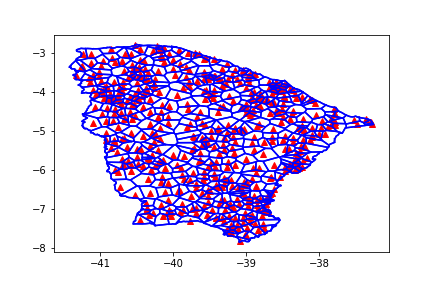

In [11]:
display.Image('0_ce_thi.png', width=500)

### Criar um novo DataArray para continuar sua análise ...

In [12]:
date_range = pd.date_range('2021-06-01', '2021-09-21', freq='D')

In [13]:
# Não tem lat e lon pois é média ponderada sobre o Ceará
da = xr.DataArray(
    pr_daily_ce,
    coords=[date_range],
    dims=['time'],
    name='pr'
)

In [14]:
da

<xarray.DataArray 'pr' (time: 113)>
array([ 1.16206199,  0.40220704,  0.00710346,  0.01417088,  0.        ,
        0.05434495,  0.26987746,  0.72447605,  1.4275072 ,  1.74800551,
        0.15618948,  0.63639947,  1.11640072,  0.45746831,  0.15952731,
        0.61778368,  0.32491831,  4.11176688,  2.25069103,  0.13594917,
        0.05148535,  0.08699253,  0.02611545,  0.14663501,  0.01987093,
        0.00044177,  0.03691747,  0.03784965,  0.11409817,  0.14658566,
        0.45144895, 15.42304835,  1.80612219,  2.25481515,  0.28890548,
        0.05641062,  0.01069524,  0.00308519,  0.00379351,  0.00071968,
        0.3614642 ,  0.03448856,  0.05198235,  0.        ,  0.0132376 ,
        0.02305965,  0.12676546,  0.18230224,  0.07896925,  0.18930894,
        0.0887502 ,  0.03400244,  0.        ,  0.00309695,  0.        ,
        0.01504145,  0.00673682,  0.00116128,  0.00056862,  0.11968085,
        0.        ,  0.00241424,  0.02350376,  0.        ,  0.00696062,
        0.01572684,  0.        ,  0.        ,  0.00252292,  0.        ,
        0.11475387,  0.00522465,  0.02081306,  0.02954041,  0.00144361,
        0.01418553,  0.09919133,  0.29872617,  0.        ,  0.        ,
        0.01011514,  0.00294948,  0.        ,  0.        ,  0.05710613,
        0.0083171 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00851132,  0.00567421,
        0.0037626 ,  0.        ,  0.        ,  0.01533348,  0.00356467,
        0.        ,  0.        ,  0.00231385,  0.        ,  0.        ,
        0.        ,  0.45523451,  0.06934399,  0.44115237,  0.        ,
        0.        ,  0.        ,  0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-01 2021-06-02 ... 2021-09-21

### Usando NetCDF

In [15]:
nc_file = 'RSM97.PLEV.202103.DAILY.nc'  # diário

In [16]:
with xr.open_dataset(nc_file) as dset:
#   print(dset)
    pr_model = dset['pcp'].values
    lat = dset['latitude'].values
    lon = dset['longitude'].values

In [17]:
pr_model.shape

(31, 72, 109)

In [18]:
pr_daily_ce = thiessen(
    pr_model,
    lat,
    lon,
    'pontos_ce.txt',
    pf=-1,
    sp=',',
    num_proc=2,
    usenc=True,
    figname='ce_thi_model.png')[0]

In [19]:
# DICA: Criar um novo DataArray com esse Numpy Array...
pr_daily_ce

array([ 0.04407808,  0.21916888,  2.4019312 ,  8.14629976,  0.44212285,
        0.20539308,  1.22867887,  0.39941573,  0.60872421,  0.4916589 ,
        0.18119865,  0.        ,  0.05093205,  0.00759205,  0.        ,
        0.        ,  0.11395332,  1.39806205,  0.50487623,  0.0074327 ,
        0.59340757,  0.00181451,  2.78464756,  8.01657423,  6.92792686,
       18.58633689, 11.96560512,  6.02198639,  1.69874656,  0.        ,
        1.88522041])

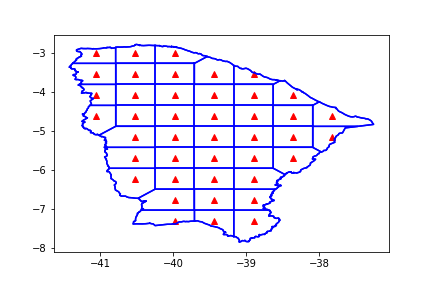

In [20]:
display.Image('0_ce_thi_model.png', width=500)